# Visualisation of Neural Net Learning Process
This Jupyter Notebook has the aim to visualise the learning process of Neural Nets in a very intuitive way.

### Construct Data

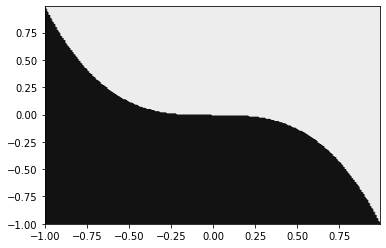

In [23]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-1,1,0.01)
y = np.arange(-1,1,0.01)
xx, yy = np.meshgrid(x, y)

z = (xx**3 + 1*yy)
z[z<0] = 0
z[z>0] = 1
plt.figure()
plt.contourf(x,y,z, cmap='gray')
plt.show()

In [24]:
Training_Data = np.empty((300,2))
Train_Target = np.zeros((300,2))
for i in range(300):
    ind1 = np.random.randint(200)
    ind2 = np.random.randint(200)
    Training_Data[i,:] = [x[ind1], y[ind2]]
    ind = int(z[ind2,ind1])
    Train_Target[i,ind] = 1

In [25]:
def sigmoid(x):
    return 1/(1+np.e ** -x)
def d_sigmoid(x):
    return x * (1-x)

activation_func = sigmoid
d_activation_func = d_sigmoid

NN_architecture = [
    {"inputs":2, "neurons":4},
    {"inputs":4, "neurons":4},
    {"inputs":4, "neurons":2}
]

def forward_single_layer(out_prev, w_curr, b_curr):
        return activation_func(np.dot(w_curr, out_prev)+b_curr)

class NeuralNetwork:
    def __init__(self, architecture):
        self.architecture = architecture
        self.parameters = {}
        for idx, layer in enumerate(architecture):
            layer_idx = idx+1
            layer_input = layer["inputs"]
            layer_output = layer["neurons"]
            self.parameters['W'+str(layer_idx)] = np.random.randn(layer_output,layer_input)
            self.parameters['B'+str(layer_idx)] = np.random.randn(layer_output,1)

    def forward_propagation(self, inputs):
        inputs = np.array(inputs, ndmin=2).T
        out_curr = inputs
        memory = {}
        for idx, layer in enumerate(self.architecture):
            layer_idx = idx+1
            w_curr = self.parameters["W"+str(layer_idx)]
            b_curr = self.parameters["B"+str(layer_idx)]
            out_curr = forward_single_layer(out_prev=out_curr,w_curr=w_curr,b_curr=b_curr)
            memory[idx] = out_curr
        return out_curr, memory


    def train_iteration(self, inputs, target, learn_rate):
        target = np.array(target, ndmin=2).T
        output, memory = self.forward_propagation(inputs)
        inputs = np.array(inputs, ndmin=2).T
        loss = 0
        for idx, layer in reversed(list(enumerate(self.architecture))):
            layer_idx = idx+1
            if layer_idx == len(self.architecture):
                loss += target - output
                adjust_w = learn_rate*(loss*d_activation_func(memory[idx])).dot(memory[idx-1].T)
                adjust_b = learn_rate*loss*d_activation_func(memory[idx])
                self.parameters["W"+str(layer_idx)] += (adjust_w/learn_rate - adjust_b)*learn_rate
                self.parameters["B"+str(layer_idx)] += adjust_b
            elif layer_idx == 1:
                loss = self.parameters["W"+str(layer_idx+1)].T.dot(loss)
                adjust_w = learn_rate*(loss*d_activation_func(memory[idx])).dot(inputs.T)
                adjust_b = learn_rate*loss*d_activation_func(memory[idx])
                self.parameters["W"+str(layer_idx)] += (adjust_w/learn_rate - adjust_b)*learn_rate
                self.parameters["B"+str(layer_idx)] += adjust_b
            else:
                loss = self.parameters["W"+str(layer_idx+1)].T.dot(loss)
                adjust_w = learn_rate*(loss*d_activation_func(memory[idx])).dot(memory[idx-1].T)
                adjust_b = learn_rate*loss*d_activation_func(memory[idx])
                self.parameters["W"+str(layer_idx)] += (adjust_w/learn_rate - adjust_b)*learn_rate
                self.parameters["B"+str(layer_idx)] += adjust_b

    def train(self, inputs, targets, epoches):
        plt.figure(figsize=(50,50))
        for epoch in range(epoches):
            shuffler = np.random.permutation(len(targets))
            inputs = inputs[shuffler]
            targets = targets[shuffler]
            for i in range(0,300):
                inputdata = inputs[i,:]
                target = targets[i,:]
                self.train_iteration(inputdata, target, 0.1)

            # Visualisation (This section causes long runtime!)
            results = np.empty((200,200))
            for i in range(200):
                for ii in range(200):
                    Data = [xx[i,ii], yy[i,ii]]
                    out, mem = self.forward_propagation(Data)
                    results[i, ii] = np.argmax(out)
            plt.subplot(7,7,epoch+1)
            plt.contourf(x,y,results, cmap='gray')
            plt.axis('off')
            plt.title('Epoch number'+str(epoch+1))
            colors = []
            for i in range(300):
                if Train_Target[i, 0] > 0.5:
                    colors.append('r')
                else:
                    colors.append('b')
            plt.scatter(Training_Data[:,0],Training_Data[:,1],edgecolors=colors)
        plt.show()


NN = NeuralNetwork(NN_architecture)

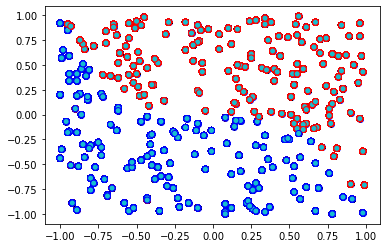

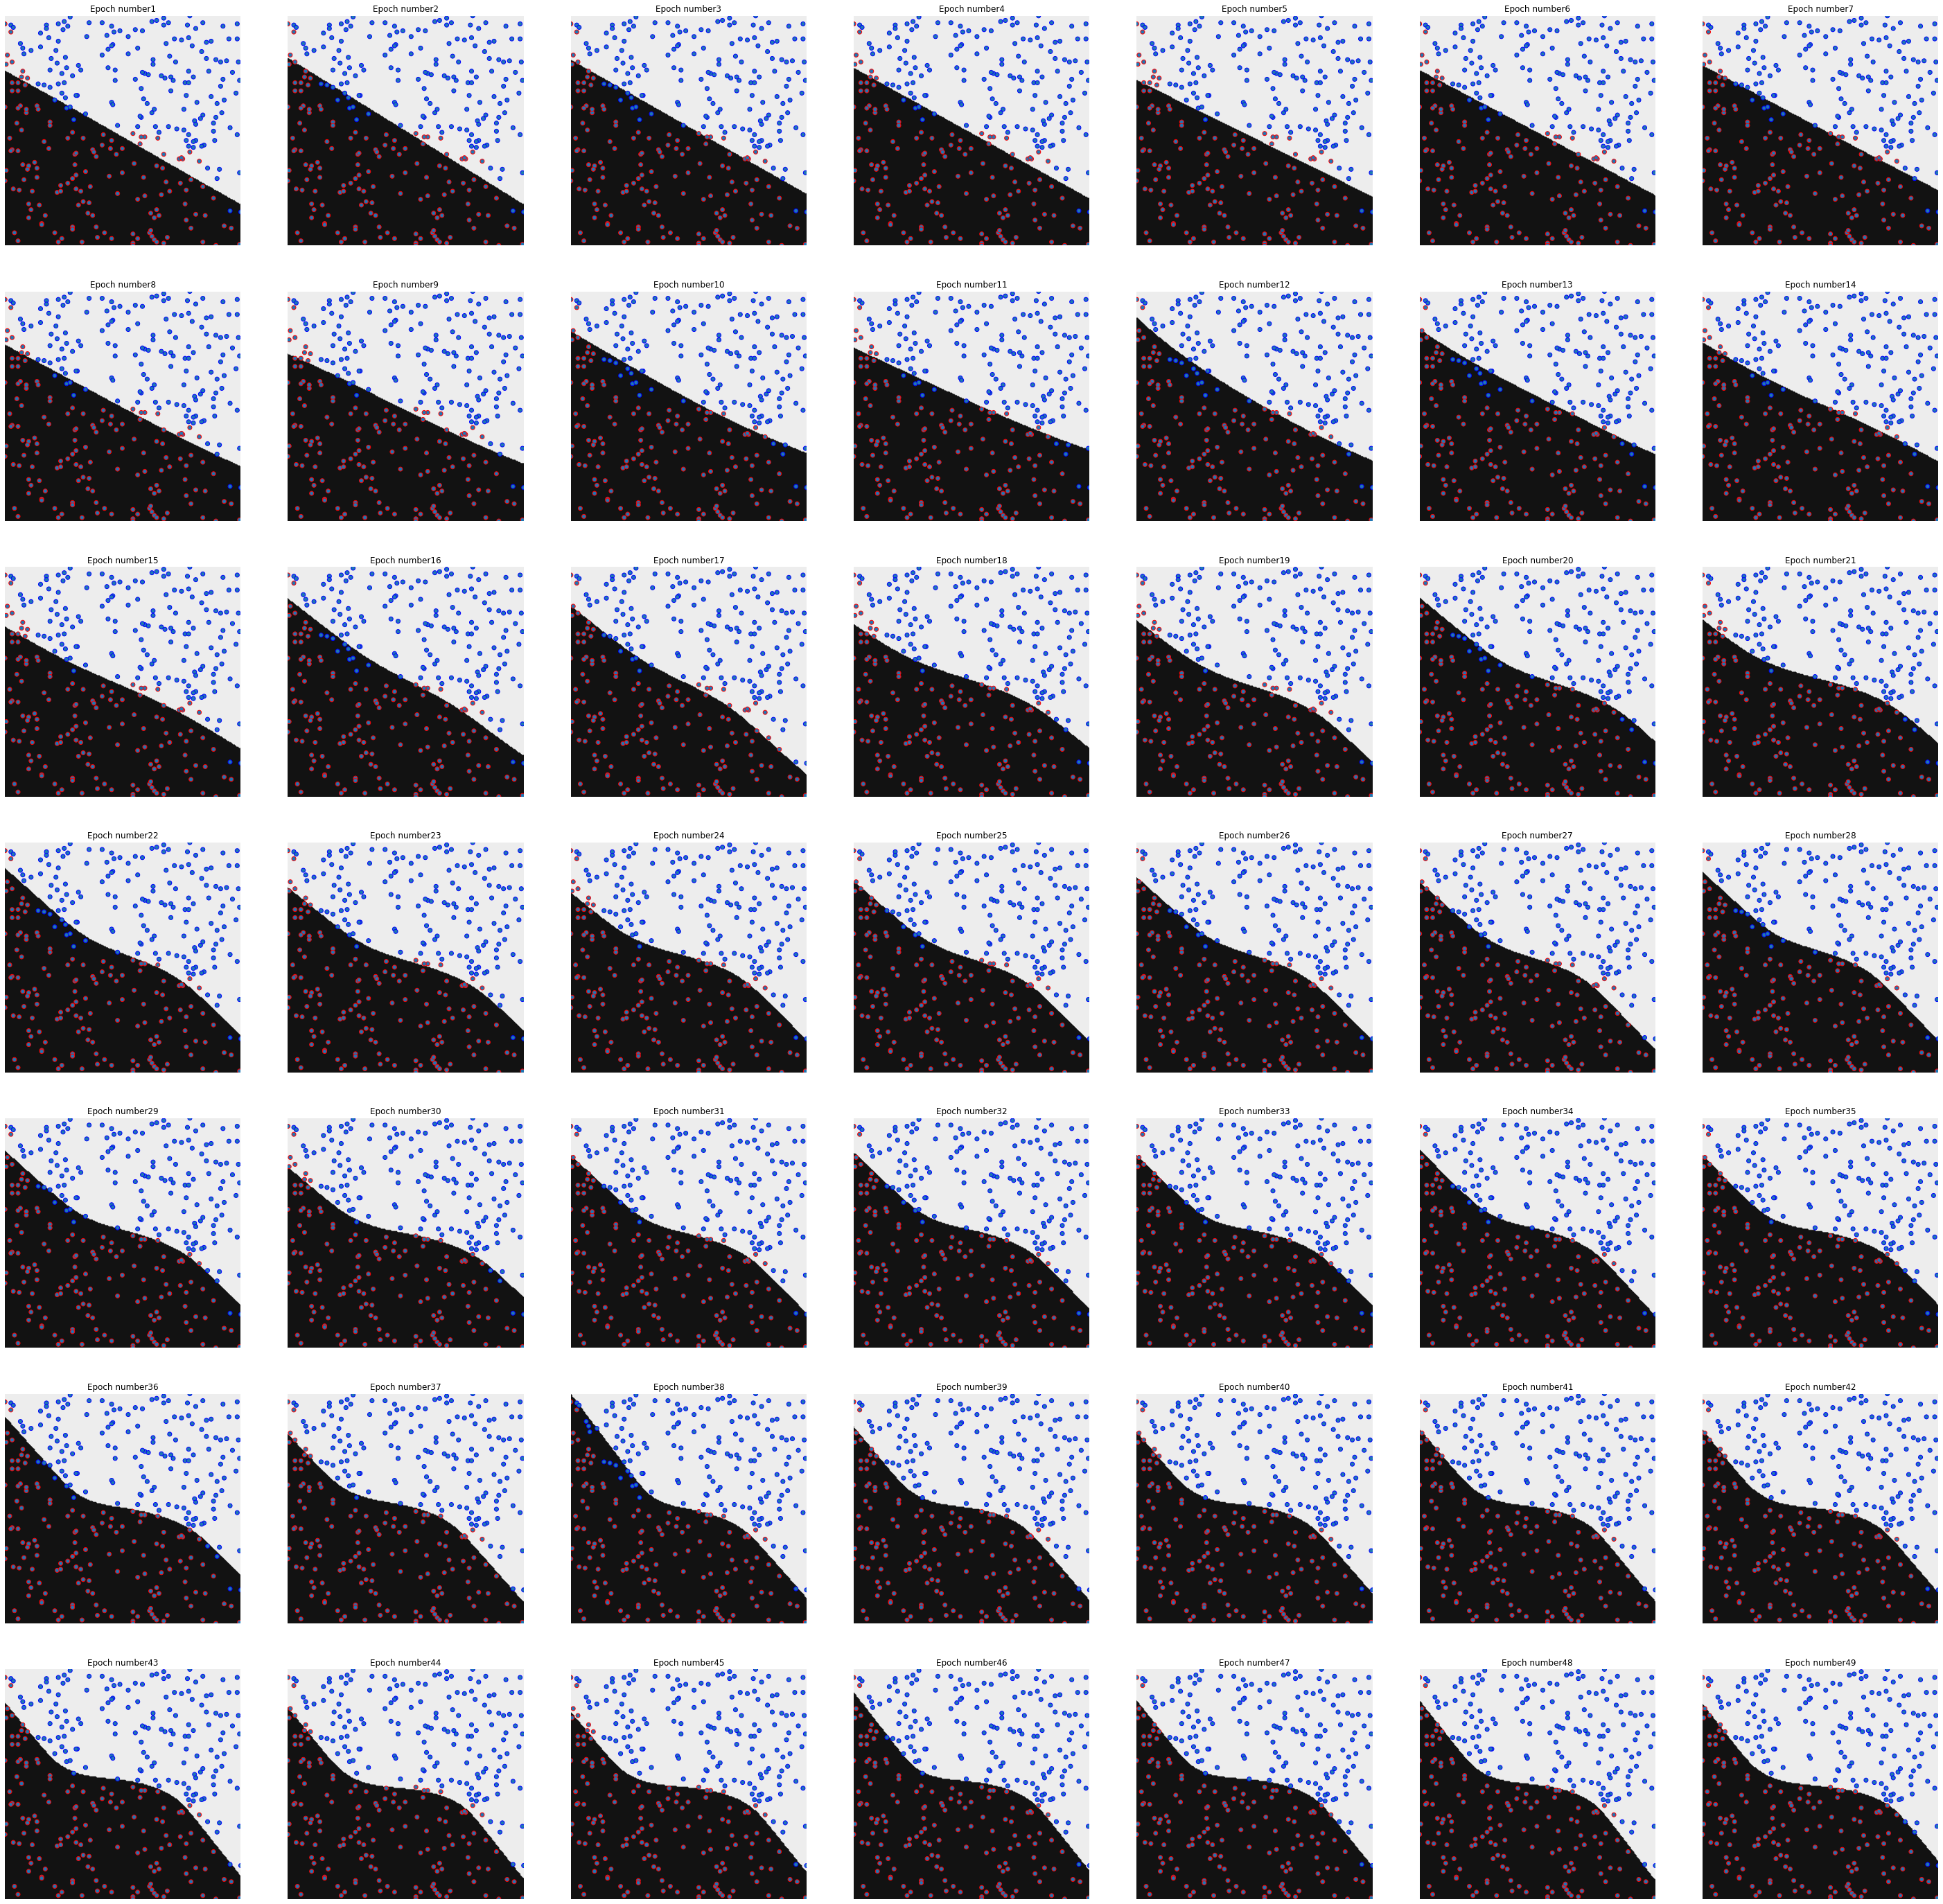

In [26]:
colors = []
for i in range(300):
    if Train_Target[i,0] == 0:
        colors.append('r')
    else:
        colors.append('b')
    plt.scatter(Training_Data[:,0],Training_Data[:,1],edgecolors=colors)
plt.show()

NN.train(Training_Data,Train_Target,49)